
#  Dicom to nifti, upscale voxel size by factor of 10 and reorientate data in atlas orientation.
To run this script, you need to install AFNI, FSL, and xlrd.
<br>
To install FSL on windows 10 see: # https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FslInstallation/Windows
<br>
To install AFNI see: #https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/background_install/install_instructs/steps_linux_ubuntu18.html
<br>
To install xlrd to read excel file see: #https://www.geeksforgeeks.org/reading-excel-file-using-python/
<br>
To install dcm2nii see: sudo apt-get install mricron


In [3]:
#!/usr/bin/env python

# Reading an excel file using Python 
import xlrd 
import os

# Give the location of the excel file 
loc = ("/mnt/d/Data/Chick/Imprinting/experiments_info.xlsx") 
analysis_path = "/mnt/d/Data/Chick/Imprinting/analysis"
rescale_factor = 10
# To open Workbook 
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 
for r in range(sheet.nrows):
    if sheet.cell_value(r,3) == 1:
        raw_path = sheet.cell_value(r,7)
        output_path = (analysis_path+ "/sub%02d/%s")%(int(sheet.cell_value(r,0)),sheet.cell_value(r,5))
        if os.path.exists(output_path):
            pass
        else:
            os.makedirs(output_path)
            dicom_directory = os.path.join(raw_path,str(int(sheet.cell_value(r,6))),'pdata/1/dicom')
            #print(dicom_directory)
            print(output_path)
              # output name

            os.system('dcm2nii -4 -g -o %s %s '%(output_path,dicom_directory))            
            files = os.listdir(output_path)
            if sheet.cell_value(r,5) == 'func':
                 dst = os.path.join(output_path, 'bold.nii.gz')
            elif sheet.cell_value(r,5) == 'anat':
                 dst = os.path.join(output_path, 'anat.nii.gz')
            elif sheet.cell_value(r,5) == 'rest':
                dst = os.path.join(output_path, 'bold.nii.gz')
            src = os.path.join(output_path, files[0]) 
            os.rename(src, dst) 
            #upscale voxel size by factor of 10
            os.system('3drefit -xyzscale %s %s'%(rescale_factor,dst))
            #reoriet data to atlas orient
            #os.system('fslswapdim %s x -z -y %s'%(dst,dst))

           

/mnt/d/Data/Chick/Imprinting/analysis/sub09/func
/mnt/d/Data/Chick/Imprinting/analysis/sub09/anat
/mnt/d/Data/Chick/Imprinting/analysis/sub09/rest
/mnt/d/Data/Chick/Imprinting/analysis/sub11/func
/mnt/d/Data/Chick/Imprinting/analysis/sub11/anat
/mnt/d/Data/Chick/Imprinting/analysis/sub11/rest
/mnt/d/Data/Chick/Imprinting/analysis/sub12/func
/mnt/d/Data/Chick/Imprinting/analysis/sub12/anat
/mnt/d/Data/Chick/Imprinting/analysis/sub12/rest
/mnt/d/Data/Chick/Imprinting/analysis/sub14/func
/mnt/d/Data/Chick/Imprinting/analysis/sub14/anat
/mnt/d/Data/Chick/Imprinting/analysis/sub14/rest
/mnt/d/Data/Chick/Imprinting/analysis/sub15/func
/mnt/d/Data/Chick/Imprinting/analysis/sub15/anat
/mnt/d/Data/Chick/Imprinting/analysis/sub15/rest
/mnt/d/Data/Chick/Imprinting/analysis/sub16/func
/mnt/d/Data/Chick/Imprinting/analysis/sub16/anat
/mnt/d/Data/Chick/Imprinting/analysis/sub16/rest
/mnt/d/Data/Chick/Imprinting/analysis/sub18/func
/mnt/d/Data/Chick/Imprinting/analysis/sub18/anat
/mnt/d/Data/Chick/Im

/home/mehdi/anaconda3/lib/python3.8/site-packages/nilearn/plotting/displays.py:607: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figure, figsize=figsize,


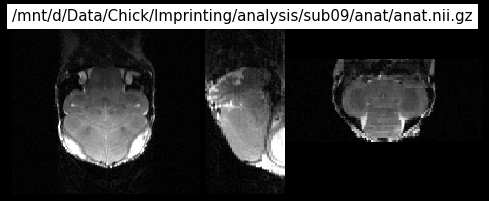

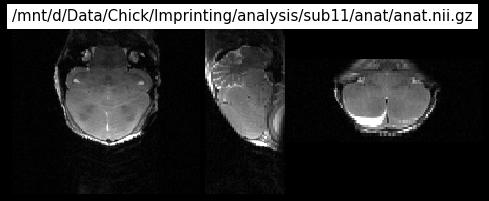

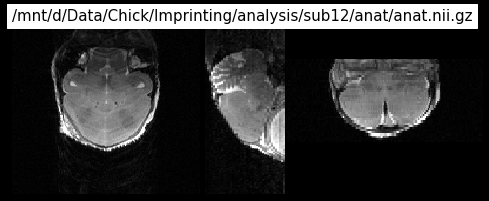

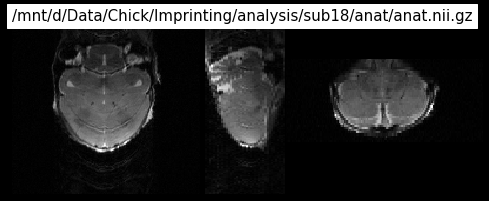

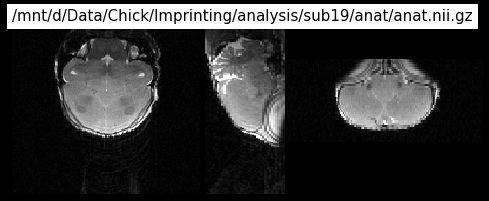

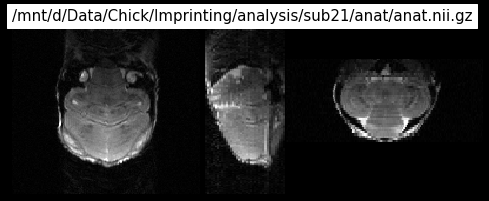

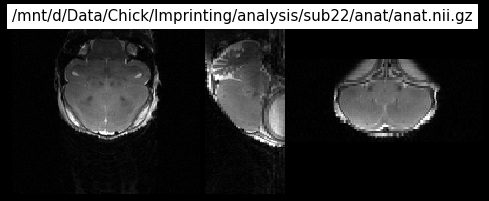

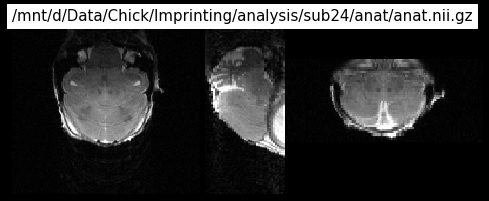

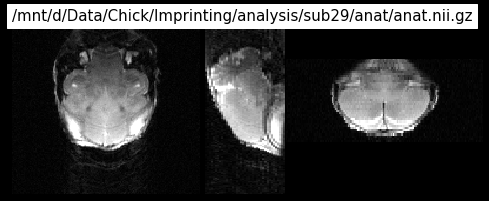

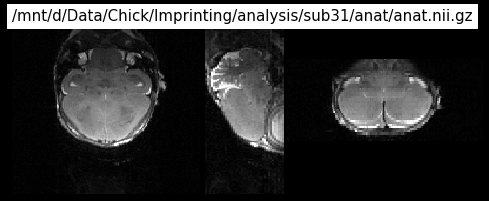

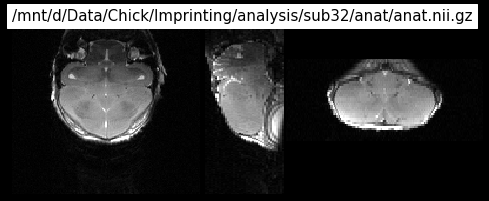

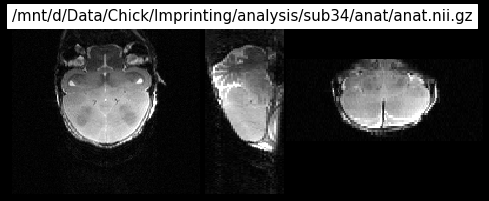

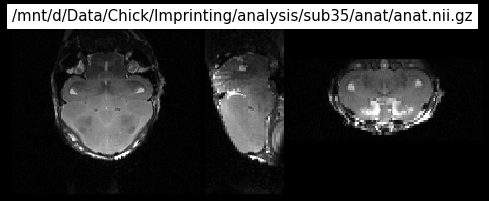

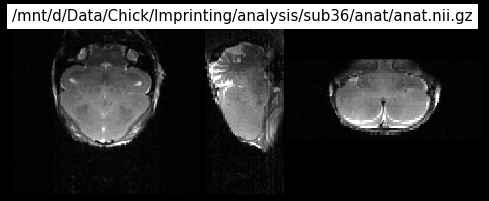

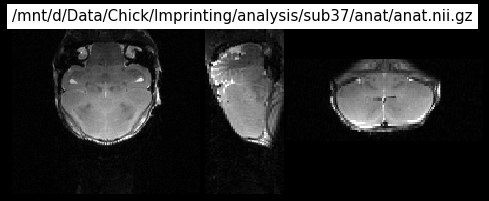

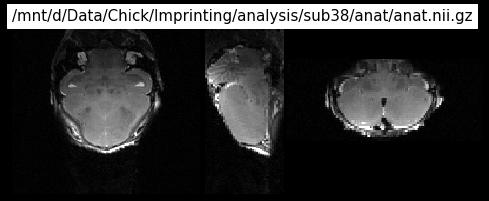

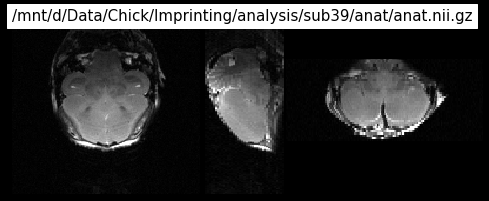

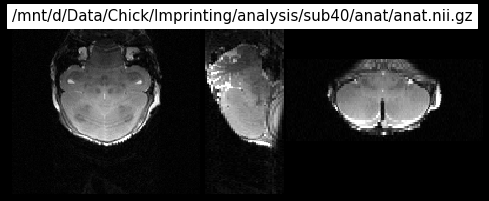

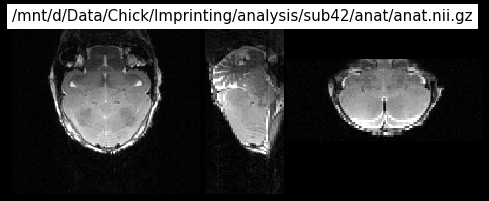

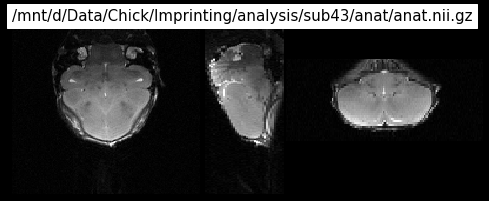

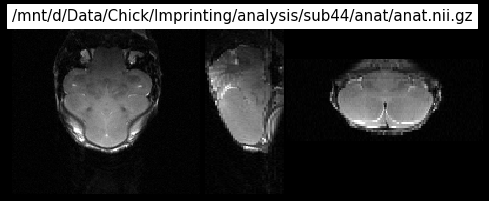

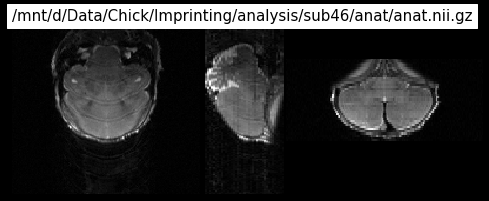

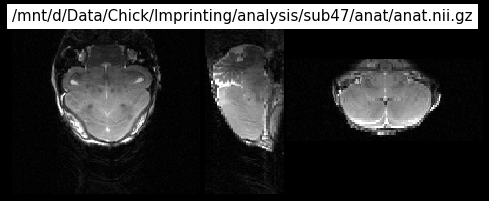

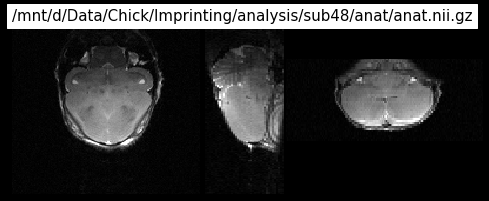

In [16]:
from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
data_path = '/mnt/d/Data/Chick/Imprinting/analysis'
subdirs = glob.glob('%s/sub*/anat/anat.nii.gz'%(data_path))
for curr_sub in subdirs:
    plot_anat(curr_sub, title=curr_sub, cut_coords = (20,20,10),
             display_mode='ortho', dim=-1, draw_cross=False, annotate=False)

In [15]:
# apply cleaned mask on anatimical data
import os
import glob
from shutil import copyfile
data_path = '/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/'
anat_dirs = glob.glob('%s/sub*/anat/anat_brain_mask.nii.gz'%(data_path))
new_path = '/mnt/d/Data/Chick/Imprinting/analysis/'
for curr_anat in anat_dirs:
    print(curr_anat)
    sub_name = curr_anat.split('/')[-3]
    anat_path = os.path.join(new_path,sub_name,'anat/anat_brain_mask.nii.gz')
    copyfile(curr_anat, anat_path)
    

/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub09/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub11/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub12/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub18/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub19/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub21/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub22/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub24/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub29/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub31/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis_old/GLM_analysis/sub32/anat/anat_brain_mask.nii.gz
/mnt/d/Data/Chick/Imp